In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import date, datetime

In [17]:
india_daily = pd.read_csv('data/Wheat Futures India Daily (2015-22).csv',index_col=0)
india_weekly = pd.read_csv('data/Wheat Futures India Weekly (2012-22).csv',index_col=0)
india_monthly = pd.read_csv('data/Wheat Futures India Monthly (2007-22).csv',index_col=0)

In [18]:
india_daily.index = pd.to_datetime(india_daily.index, format='%d-%m-%Y')
#india_daily.index = india_daily.index.strptime('%d-%m-%Y')

india_weekly.index = pd.to_datetime(india_weekly.index, format='%d-%m-%Y')
#india_weekly.index = india_weekly.index.strftime('%d-%m-%Y')

india_monthly.index = pd.to_datetime(india_monthly.index, format='%d-%m-%Y')
#india_monthly.index = india_monthly.index.strftime('%d-%m-%Y')


In [19]:
india_daily = india_daily.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_weekly = india_weekly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_monthly = india_monthly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)

In [20]:
india_daily = india_daily.iloc[::-1]
india_weekly = india_weekly.iloc[::-1]
india_monthly = india_monthly.iloc[::-1]

india_daily = india_daily.drop('Change %', axis=1)
india_weekly = india_weekly.drop('Change %', axis=1)
india_monthly = india_monthly.drop('Change %', axis=1)

In [21]:
type(india_daily.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
india_daily

,Price,Open,High,Low,Vol.
Date,,,,,
2015-05-20,1472.0,1470.0,1476.0,1466.0,0.28
2015-05-21,1496.0,1496.0,1514.0,1493.0,5.47
2015-05-22,1489.0,1502.0,1502.0,1487.0,4.38
2015-05-25,1473.0,1484.0,1490.0,1468.0,5.96
2015-05-26,1482.0,1469.0,1485.0,1469.0,7.93
...,...,...,...,...,...
2022-04-13,2202.0,2202.0,2202.0,2202.0,NaN
2022-04-14,2202.0,2202.0,2202.0,2202.0,NaN
2022-04-18,2251.0,2251.0,2251.0,2251.0,NaN


In [23]:
dly_chng = [0]*len(india_daily.Price.values)
weekly_chng = [0]*len(india_weekly.Price.values)
monthly_chng = [0]*len(india_monthly.Price.values)

for i in range(1, len(india_daily.Price.values)):
    dly_chng[i] = round((india_daily.Price.values[i] - india_daily.Price.values[i-1])/india_daily.Price.values[i-1] * 100, 2)

for i in range(1, len(india_weekly.Price.values)):
    weekly_chng[i] = round((india_weekly.Price.values[i] - india_weekly.Price.values[i-1])/india_weekly.Price.values[i-1] * 100, 2)

for i in range(1, len(india_monthly.Price.values)):
    monthly_chng[i] = round((india_monthly.Price.values[i] - india_monthly.Price.values[i-1])/india_monthly.Price.values[i-1] * 100, 2)

In [24]:
dly_diff = [0]*len(india_daily.Price.values)
weekly_diff = [0]*len(india_weekly.Price.values)
monthly_diff = [0]*len(india_monthly.Price.values)

for i in range(1, len(india_daily.Price.values)):
    dly_diff[i] = round((india_daily.Price.values[i] - india_daily.Price.values[i-1]), 2)

for i in range(1, len(india_weekly.Price.values)):
    weekly_diff[i] = round((india_weekly.Price.values[i] - india_weekly.Price.values[i-1]), 2)

for i in range(1, len(india_monthly.Price.values)):
    monthly_diff[i] = round((india_monthly.Price.values[i] - india_monthly.Price.values[i-1]), 2)

In [25]:
india_daily['Daily Change (%)'] = dly_chng
india_weekly['Weekly Change (%)'] = weekly_chng
india_monthly['Monthly Change (%)'] = monthly_chng

In [26]:
india_weekly

,Price,Open,High,Low,Vol.,Weekly Change (%)
Date,,,,,,
2012-04-08,1232.0,1249.0,1250.0,1231.0,9.29,0.00
2012-04-15,1181.0,1232.0,1232.0,1155.0,9.76,-4.14
2012-04-22,1185.0,1205.0,1211.0,1165.0,26.43,0.34
2012-04-29,1182.0,1193.0,1219.0,1168.0,21.71,-0.25
2012-05-06,1172.0,1184.0,1196.0,1170.0,19.23,-0.85
...,...,...,...,...,...,...
2022-03-20,2307.0,2258.0,2258.0,2258.0,NaN,2.12
2022-03-27,2255.0,2331.0,2331.0,2256.0,NaN,-2.25
2022-04-03,2216.0,2217.0,2217.0,2217.0,NaN,-1.73


In [27]:
india_daily['Daily Change (%) Squared'] = np.square(india_daily['Daily Change (%)'].values)
india_weekly['Weekly Change (%) Squared'] = np.square(india_weekly['Weekly Change (%)'].values)
india_monthly['Monthly Change (%) Squared'] = np.square(india_monthly['Monthly Change (%)'].values)

In [28]:
india_daily.head()

,Price,Open,High,Low,Vol.,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2015-05-20,1472.0,1470.0,1476.0,1466.0,0.28,0.00,0.0000
2015-05-21,1496.0,1496.0,1514.0,1493.0,5.47,1.63,2.6569
2015-05-22,1489.0,1502.0,1502.0,1487.0,4.38,-0.47,0.2209
2015-05-25,1473.0,1484.0,1490.0,1468.0,5.96,-1.07,1.1449
2015-05-26,1482.0,1469.0,1485.0,1469.0,7.93,0.61,0.3721


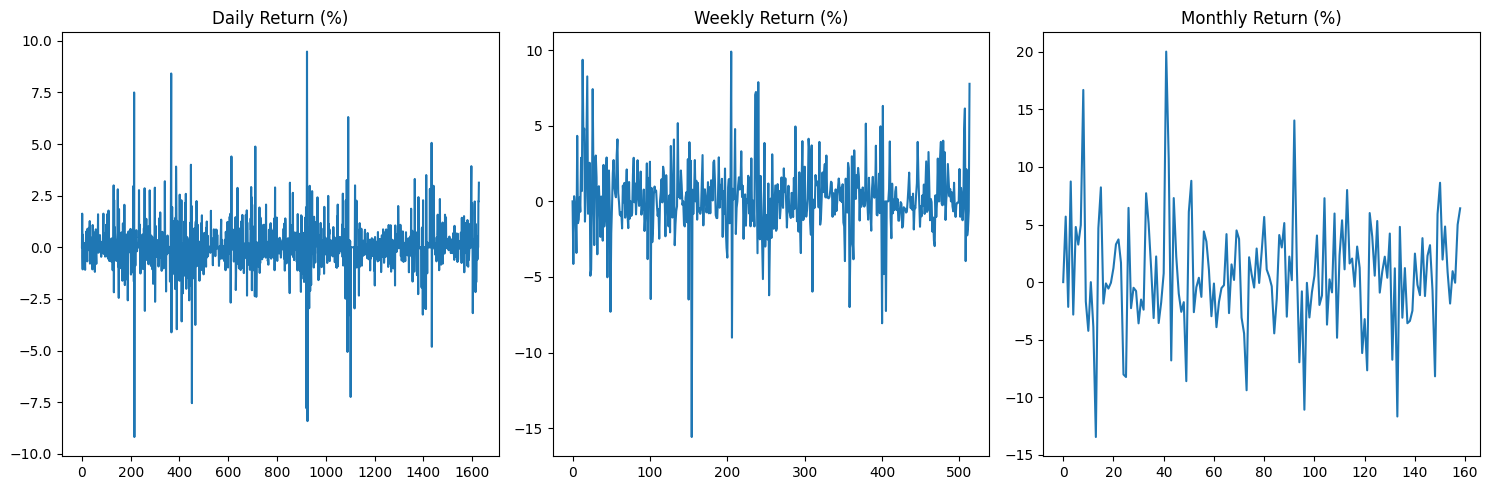

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(india_daily['Daily Change (%)'].values)
axs[0].set_title('Daily Return (%)')

# Plot in the second subplot
axs[1].plot(india_weekly['Weekly Change (%)'].values)
axs[1].set_title('Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(india_monthly['Monthly Change (%)'].values)
axs[2].set_title('Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:4: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:4: RuntimeWarning: invalid value encountered in log
  axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:8: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:8: RuntimeWarning: invalid value encountered in log
  axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:12: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(india_monthly['Monthly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_16644\3695383218.py:12: Runtim

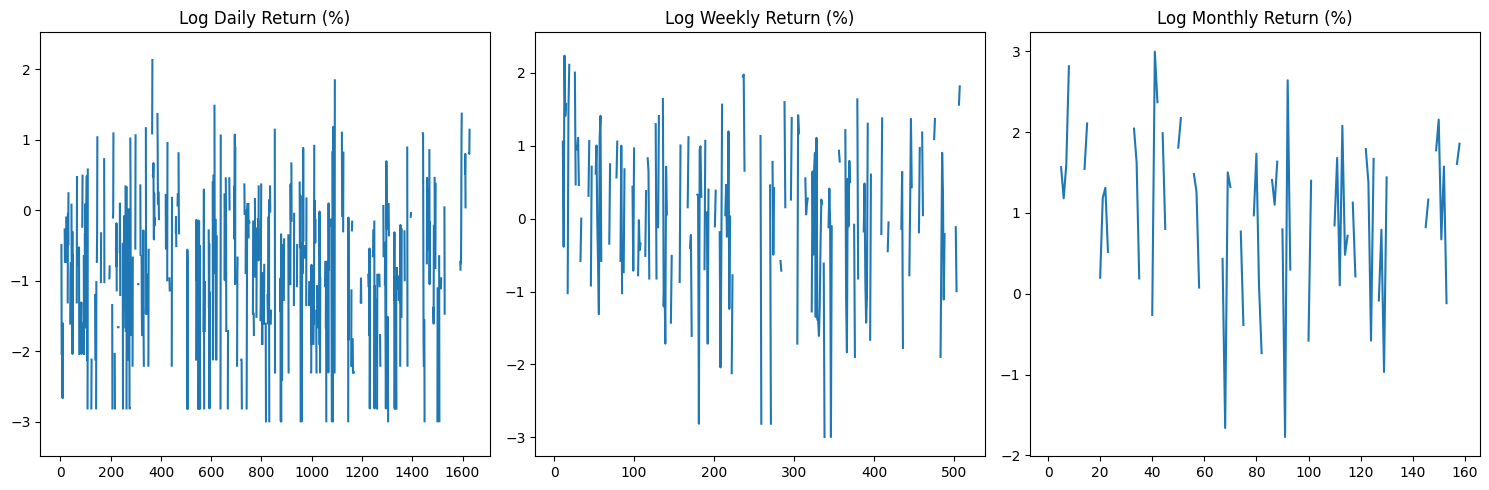

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
axs[0].set_title('Log Daily Return (%)')

# Plot in the second subplot
axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
axs[1].set_title('Log Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(np.log(india_monthly['Monthly Change (%)'].values))
axs[2].set_title('Log Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

In [32]:
type(india_daily.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
india_daily.to_csv('data/India_daily_return.csv')
india_weekly.to_csv('data/India_weekly_return.csv')
india_monthly.to_csv('data/India_monthly_return.csv')

### Auto Correlation

In [25]:
no_of_lags = 20

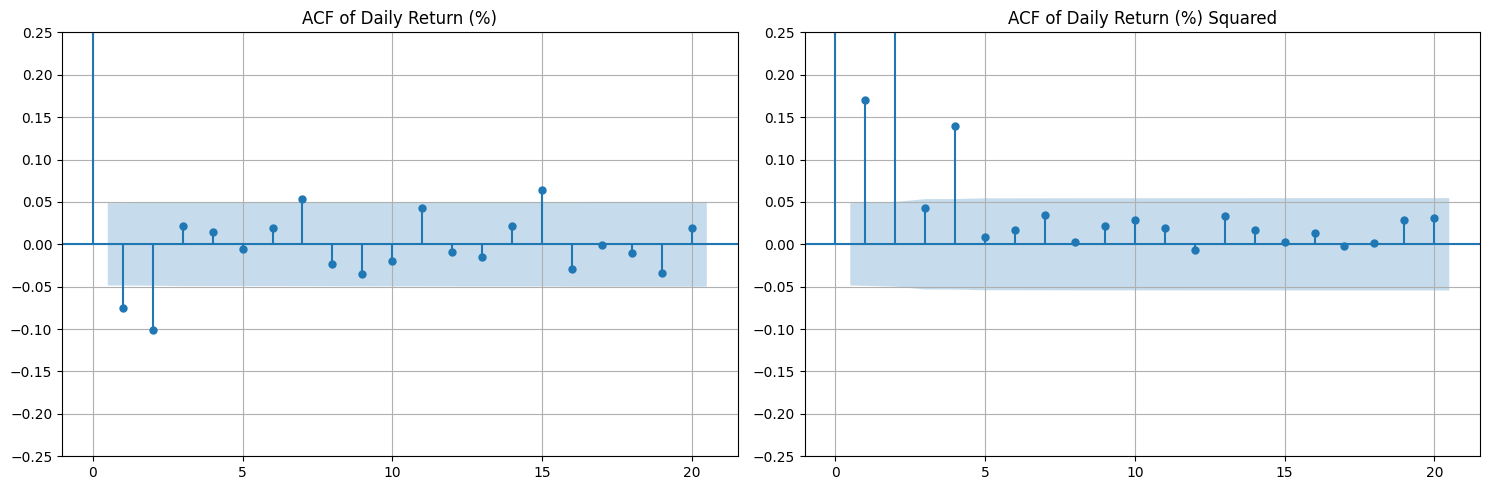

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_daily[['Daily Change (%)']], ax=axs[0], title='ACF of Daily Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_daily[['Daily Change (%) Squared']], ax=axs[1], title='ACF of Daily Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

plt.tight_layout()
plt.show()

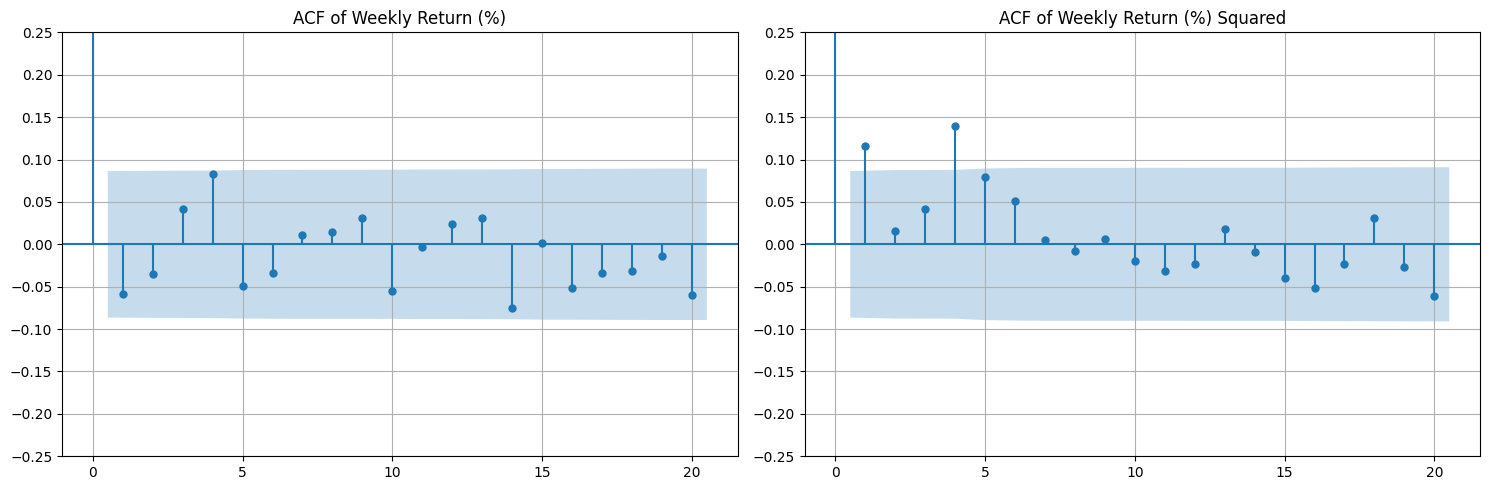

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the first subplot
plot_acf(india_weekly[['Weekly Change (%)']], ax=axs[0], title='ACF of Weekly Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='ACF of Weekly Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Display the plots
plt.tight_layout()
#plt.grid(True)
plt.show()

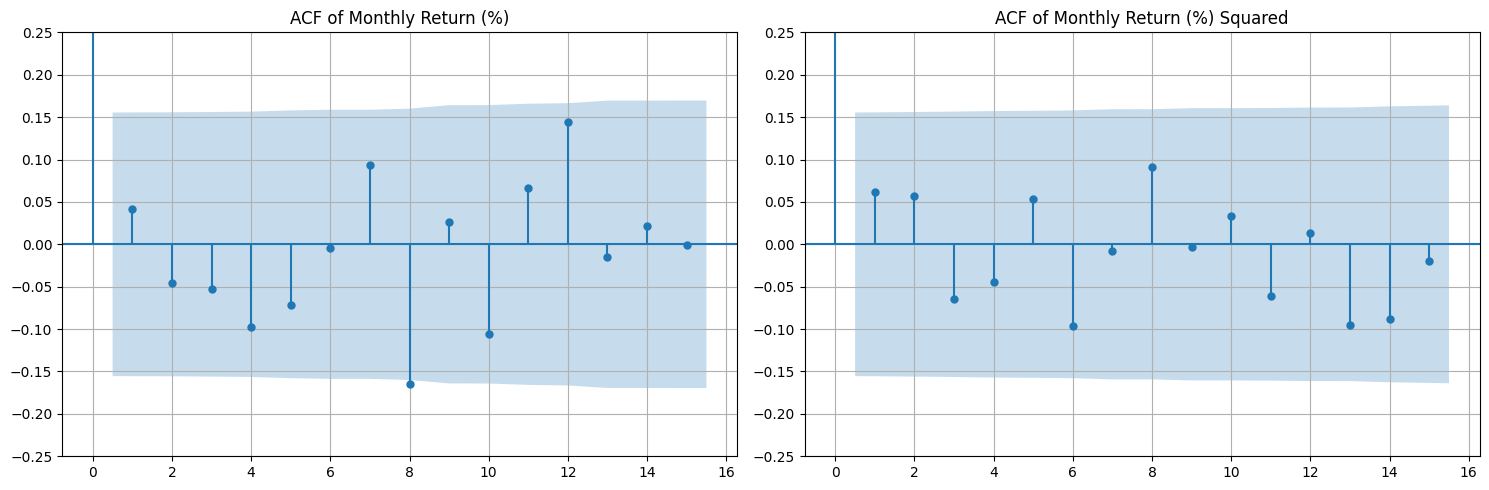

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_monthly[['Monthly Change (%)']], ax=axs[0], title='ACF of Monthly Return (%)', lags=15)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_monthly[['Monthly Change (%) Squared']], ax=axs[1], title='ACF of Monthly Return (%) Squared', lags=15)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))
# Display the plots
plt.tight_layout()
plt.show()

### Partial Auto Correlation

In [34]:
no_of_lags = 250

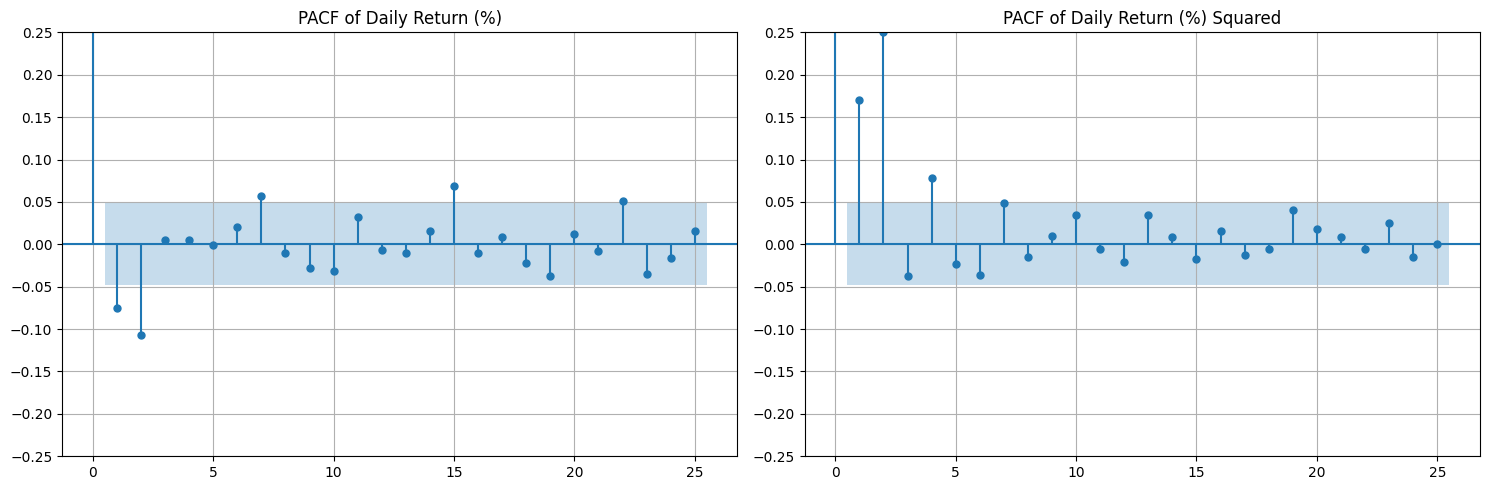

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_pacf(india_daily[['Daily Change (%)']], ax=axs[0], title='PACF of Daily Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(india_daily[['Daily Change (%) Squared']], ax=axs[1], title='PACF of Daily Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

plt.tight_layout()
plt.show()

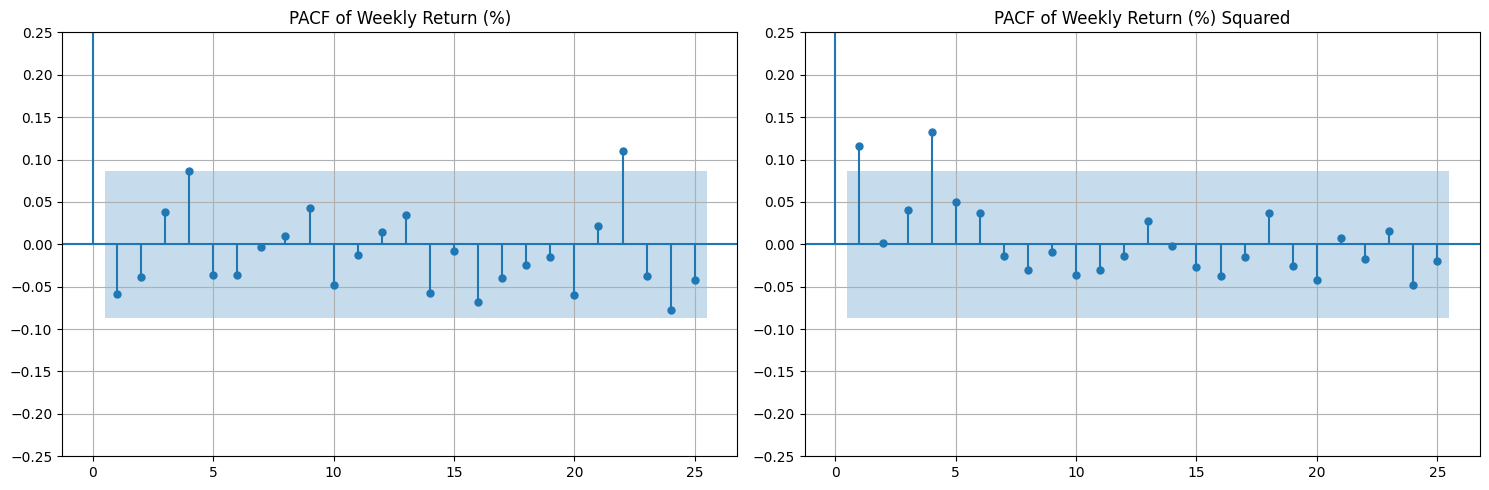

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the first subplot
plot_pacf(india_weekly[['Weekly Change (%)']], ax=axs[0], title='PACF of Weekly Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(india_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='PACF of Weekly Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Display the plots
plt.tight_layout()
#plt.grid(True)
plt.show()

In [ ]:
month_lag = 100

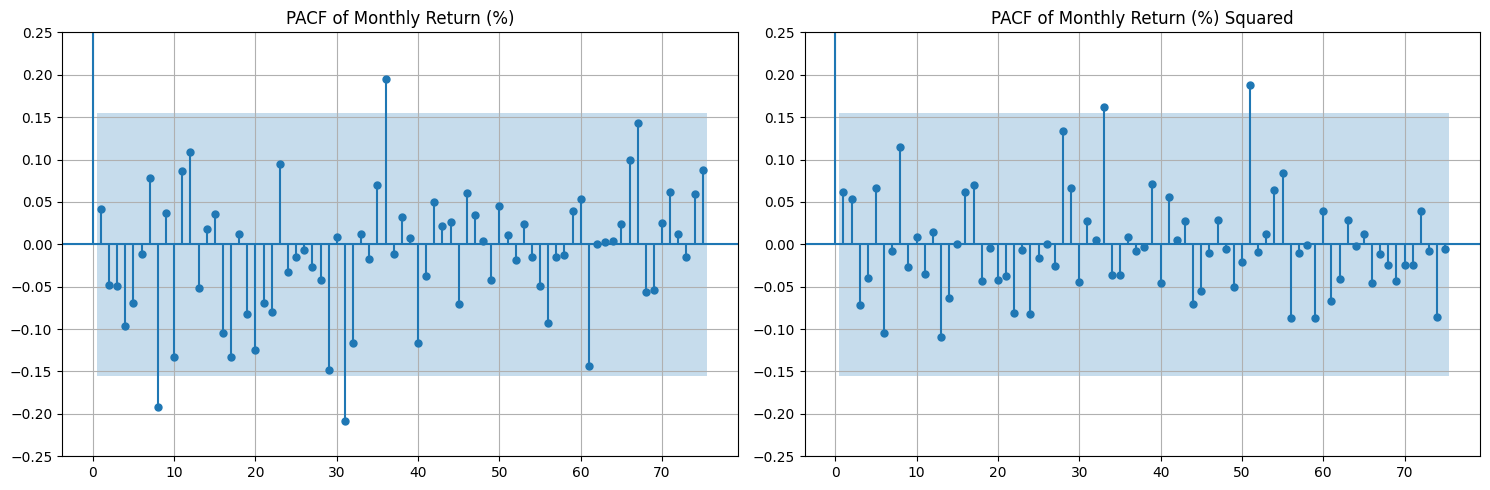

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_pacf(india_monthly[['Monthly Change (%)']], ax=axs[0], title='PACF of Monthly Return (%)', lags=month_lag)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(india_monthly[['Monthly Change (%) Squared']], ax=axs[1], title='PACF of Monthly Return (%) Squared', lags=month_lag)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))
# Display the plots
plt.tight_layout()
plt.show()